<a href="https://colab.research.google.com/github/ruygonzalez/CS155KaggleCompetition1/blob/master/KaggleNeuralNetParameterValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import torch.utils.data as data_utils
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

## Import and Process the Data
First, we import the data into dataframes and change the data a little bit.

In [0]:
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")

In [0]:
def process_dataframe(df):
  '''Given the training or test data frame, process it to
     remove the NaN values'''

  # Add new columns!
  df["bid_ask_spread1"] = df["bid1"].subtract(df["ask1"])
  df["bid_ask_spread2"] = df["bid2"].subtract(df["ask2"])
  df["bid_ask_spread3"] = df["bid3"].subtract(df["ask3"])
  df["bid_ask_spread4"] = df["bid4"].subtract(df["ask4"])
  df["bid_ask_spread5"] = df["bid5"].subtract(df["ask5"])

  df["bid_ask_div1"] = df["bid1"].div(df["ask1"])
  df["bid_ask_div2"] = df["bid2"].div(df["ask2"])
  df["bid_ask_div3"] = df["bid3"].div(df["ask3"])
  df["bid_ask_div4"] = df["bid4"].div(df["ask4"])
  df["bid_ask_div5"] = df["bid5"].div(df["ask5"])

  df["mid_price2"] = (df["bid2"].add(df["ask2"])).div(2)
  df["mid_price3"] = (df["bid3"].add(df["ask3"])).div(2)
  df["mid_price4"] = (df["bid4"].add(df["ask4"])).div(2)
  df["mid_price5"] = (df["bid5"].add(df["ask5"])).div(2)

  df["last_div_mid"] = df["last_price"].div(df["mid"])
  df["last_div_mid2"] = df["last_price"].div(df["mid_price2"])
  df["last_div_mid3"] = df["last_price"].div(df["mid_price3"])
  df["last_div_mid4"] = df["last_price"].div(df["mid_price4"])
  df["last_div_mid5"] = df["last_price"].div(df["mid_price5"])

  df["transact_div_mid"] = df["transacted_qty"].div(df["mid"])
  df["transact_div_last"] = df["transacted_qty"].div(df["last_price"])

  df["bid1_vs_last"] = df["bid1"].div(df["last_price"])
  df["bid2_vs_last"] = df["bid2"].div(df["last_price"])
  df["bid1vol_vs_last"] = df["bid1vol"].div(df["last_price"])
  df["bid2vol_vs_last"] = df["bid2vol"].div(df["last_price"])

  df["bid3_vs_last"] = df["bid3"].div(df["last_price"])
  df["bid4_vs_last"] = df["bid4"].div(df["last_price"])
  df["bid3vol_vs_last"] = df["bid3vol"].div(df["last_price"])
  df["bid4vol_vs_last"] = df["bid4vol"].div(df["last_price"])
  df["bid5_vs_last"] = df["bid5"].div(df["last_price"])
  df["bid5vol_vs_last"] = df["bid5vol"].div(df["last_price"])

  df["ask1_vs_last"] = df["ask1"].div(df["last_price"])
  df["ask2_vs_last"] = df["ask2"].div(df["last_price"])
  df["ask1vol_vs_last"] = df["ask1vol"].div(df["last_price"])
  df["ask2vol_vs_last"] = df["ask2vol"].div(df["last_price"])

  df["ask3_vs_last"] = df["ask3"].div(df["last_price"])
  df["ask4_vs_last"] = df["ask4"].div(df["last_price"])
  df["ask3vol_vs_last"] = df["ask3vol"].div(df["last_price"])
  df["ask4vol_vs_last"] = df["ask4vol"].div(df["last_price"])
  df["ask5_vs_last"] = df["ask5"].div(df["last_price"])
  df["ask5vol_vs_last"] = df["ask5vol"].div(df["last_price"])

  df["bid1_vs_mid"] = df["bid1"].div(df["mid"])
  df["bid2_vs_mid"] = df["bid2"].div(df["mid"])
  df["bid1vol_vs_mid"] = df["bid1vol"].div(df["mid"])
  df["bid2vol_vs_mid"] = df["bid2vol"].div(df["mid"])

  df["bid3_vs_mid"] = df["bid3"].div(df["mid"])
  df["bid4_vs_mid"] = df["bid4"].div(df["mid"])
  df["bid3vol_vs_mid"] = df["bid3vol"].div(df["mid"])
  df["bid4vol_vs_mid"] = df["bid4vol"].div(df["mid"])
  df["bid5_vs_mid"] = df["bid5"].div(df["mid"])
  df["bid5vol_vs_mid"] = df["bid5vol"].div(df["mid"])

  df["ask1_vs_mid"] = df["ask1"].div(df["mid"])
  df["ask2_vs_mid"] = df["ask2"].div(df["mid"])
  df["ask1vol_vs_mid"] = df["ask1vol"].div(df["mid"])
  df["ask2vol_vs_mid"] = df["ask2vol"].div(df["mid"])

  df["ask3_vs_mid"] = df["ask3"].div(df["mid"])
  df["ask4_vs_mid"] = df["ask4"].div(df["mid"])
  df["ask3vol_vs_mid"] = df["ask3vol"].div(df["mid"])
  df["ask4vol_vs_mid"] = df["ask4vol"].div(df["mid"])
  df["ask5_vs_mid"] = df["ask5"].div(df["mid"])
  df["ask5vol_vs_mid"] = df["ask5vol"].div(df["mid"])

  df["transact_div_bid1"] = df["transacted_qty"].div(df["bid1"])
  df["transact_div_bid1vol"] = df["transacted_qty"].div(df["bid1vol"])
  df["transact_div_bid2"] = df["transacted_qty"].div(df["bid2"])
  df["transact_div_bid2vol"] = df["transacted_qty"].div(df["bid2vol"])
  df["transact_div_bid3"] = df["transacted_qty"].div(df["bid3"])
  df["transact_div_bid3vol"] = df["transacted_qty"].div(df["bid3vol"])
  df["transact_div_bid4"] = df["transacted_qty"].div(df["bid4"])
  df["transact_div_bid4vol"] = df["transacted_qty"].div(df["bid4vol"])
  df["transact_div_bid5"] = df["transacted_qty"].div(df["bid5"])
  df["transact_div_bid5vol"] = df["transacted_qty"].div(df["bid5vol"])

  df["transact_div_ask1"] = df["transacted_qty"].div(df["ask1"])
  df["transact_div_ask1vol"] = df["transacted_qty"].div(df["ask1vol"])
  df["transact_div_ask2"] = df["transacted_qty"].div(df["ask2"])
  df["transact_div_ask2vol"] = df["transacted_qty"].div(df["ask2vol"])
  df["transact_div_ask3"] = df["transacted_qty"].div(df["ask3"])
  df["transact_div_ask3vol"] = df["transacted_qty"].div(df["ask3vol"])
  df["transact_div_ask4"] = df["transacted_qty"].div(df["ask4"])
  df["transact_div_ask4vol"] = df["transacted_qty"].div(df["ask4vol"])
  df["transact_div_ask5"] = df["transacted_qty"].div(df["ask5"])
  df["transact_div_ask5vol"] = df["transacted_qty"].div(df["ask5vol"])

  df["last_vs_mid"] = df["last_price"].div(df["mid"])

  df["sum_of_asks"] = df["ask1"].add(df["ask2"]).add(df["ask3"]).add(df["ask4"]).add(df["ask5"])
  df["sum_of_bids"] = df["bid1"].add(df["bid2"]).add(df["bid3"]).add(df["bid4"]).add(df["bid5"])
  df["total_volume_bids"] = df["bid1vol"].add(df["bid2vol"]).add(df["bid3vol"]).add(df["bid4vol"]).add(df["bid5vol"])
  df["total_volume_asks"] = df["ask1vol"].add(df["ask2vol"]).add(df["ask3vol"]).add(df["ask4vol"]).add(df["ask5vol"])

  df["total_ask_bid_difference"] = df["sum_of_asks"].sub(df["sum_of_bids"])
  df["total_volume_ask_bid_difference"] = df["total_volume_asks"].sub(df["total_volume_bids"])

  df["price_diff_bid_12"] = df["bid1"].sub(df["bid2"])
  df["price_diff_bid_13"] = df["bid1"].sub(df["bid3"])
  df["price_diff_bid_14"] = df["bid1"].sub(df["bid4"])
  df["price_diff_bid_15"] = df["bid1"].sub(df["bid5"])

  df["price_diff_bid_23"] = df["bid2"].sub(df["bid3"])
  df["price_diff_bid_24"] = df["bid2"].sub(df["bid4"])
  df["price_diff_bid_25"] = df["bid2"].sub(df["bid5"])  
  df["price_diff_bid_34"] = df["bid3"].sub(df["bid4"])
  df["price_diff_bid_35"] = df["bid3"].sub(df["bid5"])   
  df["price_diff_bid_45"] = df["bid4"].sub(df["bid5"])

  df["price_diff_ask_12"] = df["ask2"].sub(df["ask1"])
  df["price_diff_ask_13"] = df["ask3"].sub(df["ask1"])
  df["price_diff_ask_14"] = df["ask4"].sub(df["ask1"])
  df["price_diff_ask_15"] = df["ask5"].sub(df["ask1"])

  df["price_diff_ask_23"] = df["ask3"].sub(df["ask2"])
  df["price_diff_ask_24"] = df["ask4"].sub(df["ask2"])
  df["price_diff_ask_25"] = df["ask5"].sub(df["ask2"])
  df["price_diff_ask_34"] = df["ask4"].sub(df["ask3"])
  df["price_diff_ask_35"] = df["ask5"].sub(df["ask3"])
  df["price_diff_ask_45"] = df["ask5"].sub(df["ask4"])

  df["open_interest_vs_mid"] = df["d_open_interest"].div(df["mid"])
  df["open_interest_vs_last_price"] = df["d_open_interest"].div(df["last_price"])
  df["open_interest_vs_ask1"] = df["d_open_interest"].div(df["ask1"])
  df["open_interest_vs_bid1"] = df["d_open_interest"].div(df["bid1"])
  df["open_interest_vs_ask1vol"] = df["d_open_interest"].div(df["ask1vol"])
  df["open_interest_vs_bid1vol"] = df["d_open_interest"].div(df["bid1vol"])
  
  df["open_interest_vs_ask2"] = df["d_open_interest"].div(df["ask2"])
  df["open_interest_vs_bid2"] = df["d_open_interest"].div(df["bid2"])
  df["open_interest_vs_ask2vol"] = df["d_open_interest"].div(df["ask2vol"])
  df["open_interest_vs_bid2vol"] = df["d_open_interest"].div(df["bid2vol"])

  df["open_interest_vs_ask3"] = df["d_open_interest"].div(df["ask3"])
  df["open_interest_vs_bid3"] = df["d_open_interest"].div(df["bid3"])
  df["open_interest_vs_ask3vol"] = df["d_open_interest"].div(df["ask3vol"])
  df["open_interest_vs_bid3vol"] = df["d_open_interest"].div(df["bid3vol"])

  df["open_interest_vs_ask4"] = df["d_open_interest"].div(df["ask4"])
  df["open_interest_vs_bid4"] = df["d_open_interest"].div(df["bid4"])
  df["open_interest_vs_ask4vol"] = df["d_open_interest"].div(df["ask4vol"])
  df["open_interest_vs_bid4vol"] = df["d_open_interest"].div(df["bid4vol"])

  df["open_interest_vs_ask5"] = df["d_open_interest"].div(df["ask5"])
  df["open_interest_vs_bid5"] = df["d_open_interest"].div(df["bid5"])
  df["open_interest_vs_ask5vol"] = df["d_open_interest"].div(df["ask5vol"])
  df["open_interest_vs_bid5vol"] = df["d_open_interest"].div(df["bid5vol"])

  # Remove columns
  df_new = df.drop(columns=['id'])
  # Replace NaN with 0
  df_new = df_new.fillna(0)

  return df_new

In [0]:
train_df_processed = process_dataframe(train_df)
test_df_processed = process_dataframe(test_df)

Now, we create the tensors for the data. The data is "normalized" or scaled.

In [0]:
X = train_df_processed.drop(columns=['y'])
y = train_df_processed['y']

# Scale the X data
X_scaled = preprocessing.scale(X)

X_train = X_scaled[::2]
X_test = X_scaled[1::2]
y_train = y[::2]
y_test = y[1::2]
# Split it into train and test (validation)
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
train_dataset = data_utils.TensorDataset(torch.tensor(X_train), torch.tensor(y_train.values))
test_dataset = data_utils.TensorDataset(torch.tensor(X_test), torch.tensor(y_test.values))


test_x = test_df_processed.values.astype(float)
# Scale the X data
test_x_scaled = preprocessing.scale(test_x)
test_y = np.zeros(len(test_x))
actual_test_dataset = data_utils.TensorDataset(torch.tensor(test_x_scaled), torch.tensor(test_y))

In [0]:
def run_nn_train_and_val(model, optimizer, loss_fn, 
                         train_loader, test_loader, num_epochs):
  '''Trains a neural net on the given model, optimizer and loss_function
     for num_epochs on the train_loader data set and validating on the test_loader
     dataset'''

  train_acc = 0
  test_acc = 0

  train_list = []
  test_list = []

  for epoch in range(num_epochs):
    # First set to train
    model.train()
    # print(f'Epoch {epoch+1}/{num_epochs}:')
    train_correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        # Erase accumulated gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(data.float())

        pred = output.argmax(dim=1, keepdim=True)
        train_correct += pred.eq(target.view_as(pred)).sum().item()

        # Calculate loss
        loss = loss_fn(output, target)

        # Backward pass
        loss.backward()
        
        # Weight update
        optimizer.step()


    # print('Train Loss: %.4f' % loss.item())
    # print('Train Accuracy: %d/%d (%.4f)' % (train_correct, 
    #                                         len(train_loader.dataset),
    #                                         100. * train_correct /
    #                                         len(train_loader.dataset)))

    # Evaluate on test set
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            output = model(data.float())
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
        test_loss /= len(test_loader.dataset)

    # print('Test set: Average loss: %.4f, Accuracy: %d/%d (%.4f)' %
    #       (test_loss, correct, len(test_loader.dataset),
    #       100. * correct / len(test_loader.dataset)))
    
    train_acc = 100. * train_correct / len(train_loader.dataset)
    test_acc = 100. * correct / len(test_loader.dataset)
    print('.', end='')

    train_list.append(train_acc)
    test_list.append(test_acc)

  return train_acc, test_acc, train_list, test_list

In [0]:
def make_plot(train, test, x_vals, xlabel, title, filename):
  plt.figure()
  plt.plot(x_vals, train)
  plt.plot(x_vals, test)
  plt.ylabel('Accuracy (fraction classified correct)')
  plt.xlabel(xlabel)
  plt.title(title)
  plt.legend(['train accuracy', 'test accuracy'])
  plt.savefig(filename)
  plt.show()

........................................

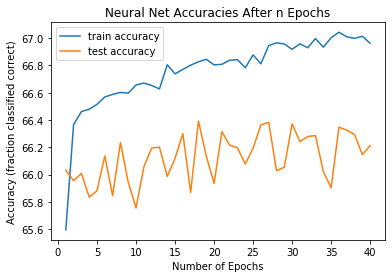

In [0]:
model = nn.Sequential(
    nn.Linear(156, 128),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(8, 2),
)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

train_loader = data_utils.DataLoader(train_dataset, batch_size=128, shuffle=False)
test_loader = data_utils.DataLoader(test_dataset, batch_size=128, shuffle=False)

_, _, train_accuracies, test_accuracies = run_nn_train_and_val(model, optimizer, loss_fn, 
                                             train_loader, test_loader, 40)

make_plot(train_accuracies, test_accuracies, np.linspace(1, 40, 40), 'Number of Epochs',
          'Neural Net Accuracies After n Epochs', 'nn_num_epochs.png')

In [0]:
actual_test_loader = data_utils.DataLoader(actual_test_dataset, batch_size=32, shuffle=False)
train_loader = data_utils.DataLoader(train_dataset, batch_size=32, shuffle=False)
test_loader = data_utils.DataLoader(test_dataset, batch_size=32, shuffle=False)

## Find the Best parameters

### Model size
Change the size of each layer with 3 inner layers, all having the same size.

Starting size= 32
...Train acc: 65.9368    Test acc: 65.8513
Starting size= 64
...Train acc: 66.0180    Test acc: 65.6707
Starting size= 128
...Train acc: 66.0153    Test acc: 65.9433


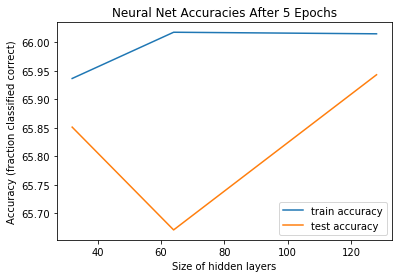

In [0]:
sizes = [32, 64, 128]
train_accuracies = []
test_accuracies = []

for size in sizes:
  model = nn.Sequential(
    nn.Linear(49, size),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(size, size),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(size, size),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(size, size),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(size, 2),
  )

  optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
  loss_fn = nn.CrossEntropyLoss()

  train_loader = data_utils.DataLoader(train_dataset, batch_size=128, shuffle=True)
  test_loader = data_utils.DataLoader(test_dataset, batch_size=128, shuffle=True)

  print('Starting size=', size)
  train_acc, test_acc, _, _ = run_nn_train_and_val(
      model, optimizer, loss_fn, train_loader, test_loader, 3)
  
  print('Train acc: %.4f    Test acc: %.4f' % (train_acc, test_acc))
  train_accuracies.append(train_acc)
  test_accuracies.append(test_acc)

make_plot(train_accuracies, test_accuracies, sizes, 'Size of hidden layers',
          'Neural Net Accuracies After 5 Epochs', 'nn_size_hidden_layer_new.png')

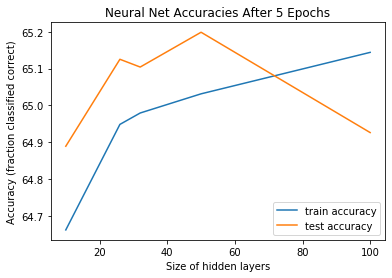

In [0]:
train_accuracies = [64.6616, 64.9484, 64.9794, 65.0315, 65.1442]
test_accuracies = [64.8891, 65.1254, 65.1043, 65.1989, 64.9262]

make_plot(train_accuracies, test_accuracies, sizes, 'Size of hidden layers',
          'Neural Net Accuracies After 5 Epochs', 'nn_size_hidden_layer_new.png')

### Dropout Probability

Starting Dropout Probability 0.005
...Train acc: 66.1843    Test acc: 66.0885
Starting Dropout Probability 0.01
...Train acc: 66.1991    Test acc: 66.0556
Starting Dropout Probability 0.05
...Train acc: 66.0579    Test acc: 66.0269
Starting Dropout Probability 0.1
...Train acc: 66.0153    Test acc: 65.9847
Starting Dropout Probability 0.2
...Train acc: 65.9566    Test acc: 66.0598


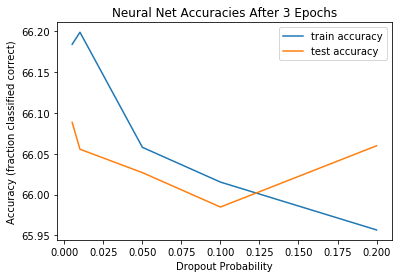

In [0]:
dropout_ps = [0.005, 0.01, 0.05, 0.1, 0.2]
train_accuracies = []
test_accuracies = []

for dp in dropout_ps:
  model = nn.Sequential(
    nn.Linear(49, 128),
    nn.ReLU(),
    nn.Dropout(dp),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Dropout(dp),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Dropout(dp),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Dropout(dp),
    nn.Linear(128, 2),
  )

  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
  loss_fn = nn.CrossEntropyLoss()

  train_loader = data_utils.DataLoader(train_dataset, batch_size=128, shuffle=True)
  test_loader = data_utils.DataLoader(test_dataset, batch_size=128, shuffle=True)
  
  print('Starting Dropout Probability', dp)
  train_acc, test_acc, _, _ = run_nn_train_and_val(model, optimizer, loss_fn, train_loader, test_loader, 3)
  print('Train acc: %.4f    Test acc: %.4f' % (train_acc, test_acc))
  train_accuracies.append(train_acc)
  test_accuracies.append(test_acc)

make_plot(train_accuracies, test_accuracies, dropout_ps, 'Dropout Probability',
          'Neural Net Accuracies After 3 Epochs', 'nn_dropout_ps_new.png')

### Batch Size

Starting batch size = 32
...Train acc: 66.2075    Test acc: 66.1037
Starting batch size = 64
...Train acc: 66.2229    Test acc: 66.0429
Starting batch size = 128
...Train acc: 66.1792    Test acc: 66.1172
Starting batch size = 256
...Train acc: 66.1642    Test acc: 66.0016
Starting batch size = 512
...Train acc: 66.1604    Test acc: 65.9433


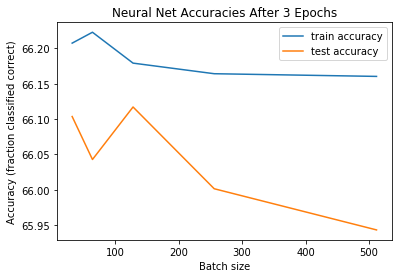

In [0]:
batch_sizes = [32, 64, 128, 256, 512]
train_accuracies = []
test_accuracies = []

for bs in batch_sizes:
  model = nn.Sequential(
    nn.Linear(49, 128),
    nn.ReLU(),
    nn.Dropout(0.01),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Dropout(0.01),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Dropout(0.01),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Dropout(0.01),
    nn.Linear(128, 2),
  )

  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
  loss_fn = nn.CrossEntropyLoss()

  train_loader = data_utils.DataLoader(train_dataset, batch_size=bs, shuffle=True)
  test_loader = data_utils.DataLoader(test_dataset, batch_size=bs, shuffle=True)

  print('Starting batch size =', bs)
  train_acc, test_acc, _, _ = run_nn_train_and_val(model, optimizer, loss_fn, train_loader, test_loader, 3)
  print('Train acc: %.4f    Test acc: %.4f' % (train_acc, test_acc))
  train_accuracies.append(train_acc)
  test_accuracies.append(test_acc)

make_plot(train_accuracies, test_accuracies, batch_sizes, 'Batch size',
          'Neural Net Accuracies After 3 Epochs', 'nn_batch_sizes_new.png')

### Learning Rates

Starting learning rate = 1e-05
...Train acc: 65.4603    Test acc: 65.3997
Starting learning rate = 5e-05
...Train acc: 66.1225    Test acc: 65.9366
Starting learning rate = 0.0001
...Train acc: 66.1263    Test acc: 66.0336
Starting learning rate = 0.001
...Train acc: 66.0889    Test acc: 65.9813
Starting learning rate = 0.01
...Train acc: 65.7120    Test acc: 65.8243


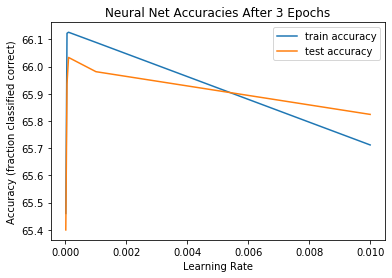

In [0]:
learning_rates = [1e-5, 5e-5, 1e-4, 1e-3, 1e-2]
train_accuracies = []
test_accuracies = []

for lr in learning_rates:
  model = nn.Sequential(
    nn.Linear(49, 128),
    nn.ReLU(),
    nn.Dropout(0.01),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Dropout(0.01),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Dropout(0.01),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Dropout(0.01),
    nn.Linear(128, 2),
  )

  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  loss_fn = nn.CrossEntropyLoss()

  train_loader = data_utils.DataLoader(train_dataset, batch_size=128, shuffle=True)
  test_loader = data_utils.DataLoader(test_dataset, batch_size=128, shuffle=True)

  print('Starting learning rate =', lr)
  train_acc, test_acc, _, _ = run_nn_train_and_val(model, optimizer, loss_fn, train_loader, test_loader, 3)
  print('Train acc: %.4f    Test acc: %.4f' % (train_acc, test_acc))
  train_accuracies.append(train_acc)
  test_accuracies.append(test_acc)

make_plot(train_accuracies, test_accuracies, learning_rates, 'Learning Rate',
          'Neural Net Accuracies After 3 Epochs', 'nn_learning_rates_new.png')

### Epochs

In [0]:
X = train_df_processed.drop(columns=['y'])
y = train_df_processed['y']

# Scale the X data
X_scaled = preprocessing.scale(X)
# Split it into train and test (validation)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
train_dataset = data_utils.TensorDataset(torch.tensor(X_train), torch.tensor(y_train.values))
test_dataset = data_utils.TensorDataset(torch.tensor(X_test), torch.tensor(y_test.values))


test_x = test_df_processed.values.astype(float)
# Scale the X data
test_x_scaled = preprocessing.scale(test_x)
test_y = np.zeros(len(test_x))
actual_test_dataset = data_utils.TensorDataset(torch.tensor(test_x_scaled), torch.tensor(test_y))

........................................................................................................................

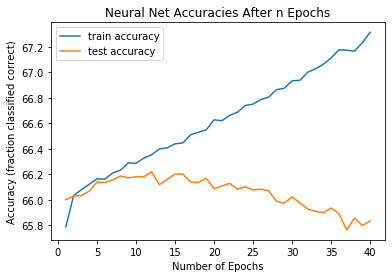

In [0]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
avg_train_acc = np.zeros(40)
avg_test_acc = np.zeros(40)
for train_index, test_index in skf.split(X_scaled, y):
  X_train, X_test = X_scaled[train_index], X_scaled[test_index]
  y_train, y_test = y[train_index], y[test_index]
  train_dataset = data_utils.TensorDataset(torch.tensor(X_train), torch.tensor(y_train.values))
  test_dataset = data_utils.TensorDataset(torch.tensor(X_test), torch.tensor(y_test.values))

  model = nn.Sequential(
    nn.Linear(49, 128),
    nn.ReLU(),
    nn.Dropout(0.01),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Dropout(0.01),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Dropout(0.01),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Dropout(0.01),
    nn.Linear(128, 2),
  )

  optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
  loss_fn = nn.CrossEntropyLoss()

  train_loader = data_utils.DataLoader(train_dataset, batch_size=128, shuffle=True)
  test_loader = data_utils.DataLoader(test_dataset, batch_size=128, shuffle=True)

  _, _, train_accuracies, test_accuracies = run_nn_train_and_val(model, optimizer, loss_fn, 
                                             train_loader, test_loader, 40)
  avg_train_acc = np.add(avg_train_acc, train_accuracies)
  avg_test_acc = np.add(avg_test_acc, test_accuracies)

make_plot(avg_train_acc/3, avg_test_acc/3, np.linspace(1, 40, 40), 'Number of Epochs',
          'Neural Net Accuracies After n Epochs', 'nn_num_epochs.png')

In [0]:
X = train_df_processed.drop(columns=['y'])
y = train_df_processed['y']

# Scale the X data
X_scaled = preprocessing.scale(X)
train_dataset = data_utils.TensorDataset(torch.tensor(X_scaled), torch.tensor(y))

test_x = test_df_processed
# Scale the X data
test_x_scaled = preprocessing.scale(test_x)
test_y = np.zeros(len(test_x))
actual_test_dataset = data_utils.TensorDataset(torch.tensor(test_x_scaled), torch.tensor(test_y))

In [0]:
model = nn.Sequential(
    nn.Linear(26, 50),
    nn.ReLU(),
    nn.Dropout(0.01),
    nn.Linear(50, 50),
    nn.ReLU(),
    nn.Dropout(0.01),
    nn.Linear(50, 50),
    nn.ReLU(),
    nn.Dropout(0.01),
    nn.Linear(50, 50),
    nn.ReLU(),
    nn.Dropout(0.01),
    nn.Linear(50, 2),
)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

train_loader = data_utils.DataLoader(train_dataset, batch_size=128, shuffle=True)
actual_test_loader = data_utils.DataLoader(actual_test_dataset, batch_size=128, shuffle=True)

for epoch in range(10):
    # First set to train
    model.train()
    print(f'Epoch {epoch+1}/10:')
    train_correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        # Erase accumulated gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(data.float())

        pred = output.argmax(dim=1, keepdim=True)
        train_correct += pred.eq(target.view_as(pred)).sum().item()

        # Calculate loss
        loss = loss_fn(output, target)

        # Backward pass
        loss.backward()
        
        # Weight update
        optimizer.step()


    print('Train Loss: %.4f' % loss.item())
    print('Train Accuracy: %d/%d (%.4f)' % (train_correct, 
                                            len(train_loader.dataset),
                                            100. * train_correct /
                                            len(train_loader.dataset)))
    


Epoch 1/10:
Train Loss: 0.6129
Train Accuracy: 383967/592380 (64.8177)
Epoch 2/10:
Train Loss: 0.6028
Train Accuracy: 385239/592380 (65.0324)
Epoch 3/10:
Train Loss: 0.6067
Train Accuracy: 386007/592380 (65.1621)
Epoch 4/10:
Train Loss: 0.5908
Train Accuracy: 386170/592380 (65.1896)
Epoch 5/10:
Train Loss: 0.5836
Train Accuracy: 386038/592380 (65.1673)
Epoch 6/10:
Train Loss: 0.6422
Train Accuracy: 386209/592380 (65.1962)
Epoch 7/10:
Train Loss: 0.6212
Train Accuracy: 386422/592380 (65.2321)
Epoch 8/10:
Train Loss: 0.6108
Train Accuracy: 386664/592380 (65.2730)
Epoch 9/10:
Train Loss: 0.6214
Train Accuracy: 386578/592380 (65.2584)
Epoch 10/10:
Train Loss: 0.5980
Train Accuracy: 386540/592380 (65.2520)


In [0]:
model.eval()

test_loss = 0
correct = 0
probabilities = []

with torch.no_grad():
  for data, y in actual_test_loader:
      output = model(data.float())
      probs = F.softmax(output, dim=1).tolist()
      probabilities += probs

probabilities[0]

[0.591651976108551, 0.408348023891449]

In [0]:
test_df['Predicted'] = np.array(probabilities)[:,1]
test_df[['id','Predicted']].to_csv("submission.csv", index=False)